In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Problem Setup

In [2]:
angles = np.arange(-90, 91, 15, dtype=np.float32) # * np.pi / 180

intercepts = np.arange(-1, 8)

points = [(0,0), (1,6), (2,4), (3,6), (4,8)]

print "angles: ", angles
print "intercepts: ", intercepts
print "points: ", points

angles:  [-90. -75. -60. -45. -30. -15.   0.  15.  30.  45.  60.  75.  90.]
intercepts:  [-1  0  1  2  3  4  5  6  7]
points:  [(0, 0), (1, 6), (2, 4), (3, 6), (4, 8)]


## Question b

In [3]:
vote_table = np.zeros((len(angles), len(intercepts)), dtype=int)
eps = 0.5
angles_pi = angles * np.pi / 180

# hough transform
for i in xrange(len(angles_pi)):
    ang = angles_pi[i]
    for j in xrange(len(intercepts)):
        intercept = intercepts[j]
        for pt in points:
            if abs(pt[0] * np.tan(ang) + intercept - pt[1]) < eps:
                vote_table[i,j] = vote_table[i,j] + 1

vote_table_df = pd.DataFrame(vote_table, index=angles, columns=intercepts)
display(vote_table_df)

,-1,0,1,2,3,4,5,6,7
-90.0,0,1,0,0,0,0,0,0,0
-75.0,0,1,0,0,0,0,0,0,0
-60.0,0,1,0,0,0,0,0,0,1
-45.0,0,1,0,0,0,0,0,1,1
-30.0,0,1,0,0,0,0,1,0,1
-15.0,0,1,0,0,0,0,1,1,1
0.0,0,1,0,0,0,1,0,2,0
15.0,0,1,0,0,1,0,1,1,1
30.0,0,1,0,0,1,1,1,1,0
45.0,0,1,0,1,1,1,1,0,0


## Question c

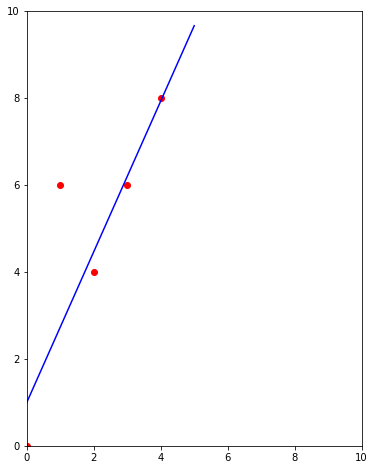

In [4]:
# draw points
plt.figure(figsize=(6,8))
points = np.array(points)
x = points[:,0]
y = points[:,1]
plt.plot(x, y, 'ro')
plt.axis([0, 10, 0, 10])

# draw Hough line
row = vote_table.argmax() / vote_table.shape[1]
col = vote_table.argmax() % vote_table.shape[1]
slope = np.tan(angles_pi[row])
intercept = intercepts[col]

x = np.arange(6)
y = slope * x + intercept
plt.plot(x, y, 'b')
plt.show()